# Classification

***

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, classification_report, \
                            accuracy_score, f1_score

In [9]:
# Define function for evaluation
def evaluate(y_te, pred, labels, return_data = False):
    
    cm = confusion_matrix(y_te, pred, labels)

    print("\nConfusion matrix (absolute):")
    cm_abs = pd.DataFrame(data = cm, index = labels, columns = labels)
    cm_abs = pd.concat([cm_abs], keys=['True'], names=[''], axis = 0)
    cm_abs = pd.concat([cm_abs], keys=['Predicted'], names=[''], axis = 1)
    display(cm_abs)

    print("\nConfusion matrix (relative):")
    cm_rel = pd.DataFrame(data = cm / cm.sum(), index = labels, columns = labels)
    cm_rel = pd.concat([cm_rel], keys=['True'], names=[''], axis = 0)
    cm_rel = pd.concat([cm_rel], keys=['Predicted'], names=[''], axis = 1)
    cm_rel = round(cm_rel * 100, 2)
    display(cm_rel)

    print("\nClassification report:\n")
    class_report = classification_report(y_true = y_te, y_pred = pred)
    print(class_report)
    
    f1 = round(f1_score(y_true = y_te, y_pred = pred), 4)
    print("Overall f1-score: {}".format(f1))

    acc = round(accuracy_score(y_true = y_te, y_pred = pred), 4)
    print("Overall accuracy: {}".format(acc))
    print("\nMajority class accuracy ({}): {}".format(y_te.value_counts().idxmax(),
                                                    round(np.mean(y_te.value_counts().idxmax() == y_te), 4)))
    
    if return_data == True:
        return({'cm_rel': cm_rel, 'cm_abs': cm_abs, 'class_report': class_report, 'acc': acc, 'f1': f1})

# Preparation

### EDA

In [10]:
# Import data
df = sns.load_dataset("tips")
display(df.head())

class_var = "smoker"
df.groupby(class_var).size()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


smoker
Yes     93
No     151
dtype: int64

Numeric variables:
['total_bill', 'tip', 'size']

Non-numeric variables:
['sex', 'day', 'time']


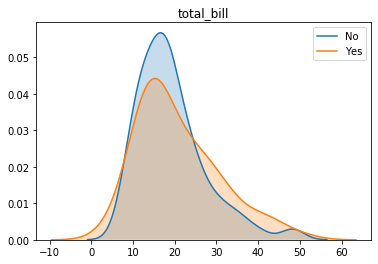

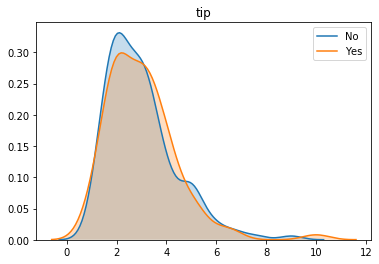

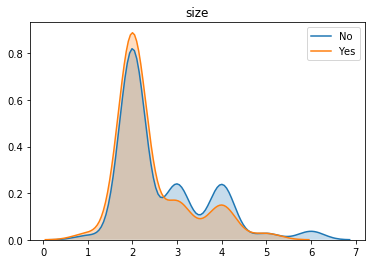

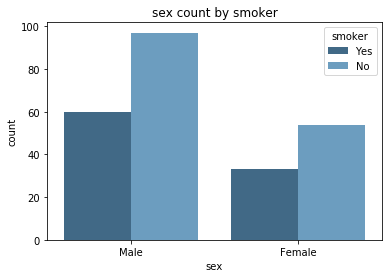

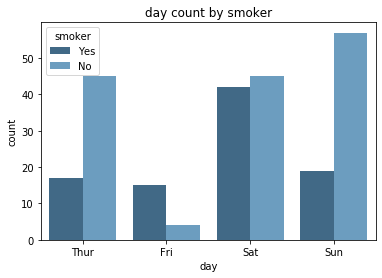

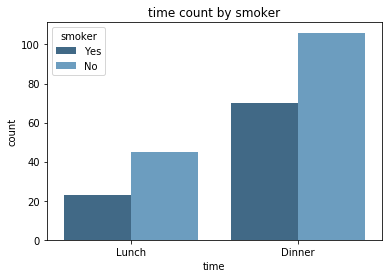

In [11]:
# Visualization
num_var = df.select_dtypes(include=np.number).columns.tolist()
dis_var = [col for col in df.columns if col not in num_var + [class_var]] 
print("Numeric variables:")
print(num_var)
print("\nNon-numeric variables:")
print(dis_var)

# Numeric variables
class_vals = df[class_var].unique()
for var in num_var:
    plt.figure()
    for class_val in class_vals:
        sns.kdeplot(df.loc[df[class_var] == class_val, var], shade = True, label=class_val);
    plt.title(var)
    plt.show();

# Non-numeric variables
for var in dis_var:
    plt.figure()
    sns.countplot(x=var, hue=class_var, palette="Blues_d", data=df)
    plt.title("{} count by {}".format(var, class_var))
    plt.show();

### Data Prep

Total number of NA: 0
Total number of rows with NA: 0
Total number of cols with NA: 0
Total number of class vals with NA: 0


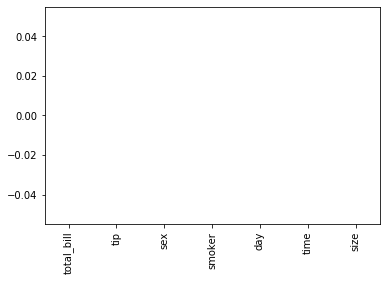

In [12]:
# Check NaN
df.isnull().sum(axis=0).plot.bar(); # plot number of NA by column
print("Total number of NA: {}".format(df.isna().sum().sum()))
print("Total number of rows with NA: {}".format(df.isna().any(axis = 1).sum()))
print("Total number of cols with NA: {}".format(df.isna().any(axis = 0).sum()))
print("Total number of class vals with NA: {}".format(df[class_var].isna().sum()))

# df = df.loc[~df[class_var].isna(), :] # Drop rows with NA in class
# df = df.dropna(axis = 0) # Drop rows with NA
# df = df.dropna(axis = 1) # Drop cols with NA
# df[num_var] = df[num_var].fillna(df[num_var].mean()) # Replace numeric with mean
# df[dis_var] = df[dis_var].fillna(df[dis_var].mode()) # Replace non-numeric with mode

In [13]:
# One hot encoding
df = pd.get_dummies(df)

# X, y split 
y = df["smoker_Yes"]
X = df.drop(columns = ["smoker_Yes", "smoker_No"])

# Train, test split
from sklearn import model_selection
X_tr, X_te, y_tr, y_te = model_selection.train_test_split(X, y, test_size=0.2, 
                                                          random_state=12345)

In [14]:
# # Oversampling train data
# X_tr, y_tr = SMOTE(random_state=12345).fit_sample(X_tr, y_tr)
# y_tr.mean()

# Modeling

### Logistic

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

steps = [#('StandardScaler', StandardScaler()), # scaling not necessary
         ('LogisticRegression', LogisticRegression())]

model = Pipeline(steps)
model.fit(X_tr, y_tr)
pred = model.predict(X_te)
evaluate(y_te, pred, labels = [1, 0], return_data = False)


Confusion matrix (absolute):


Predicted    
               1   0
                    
True 1         9  10
     0         7  23


Confusion matrix (relative):


Predicted       
               1      0
                       
True 1     18.37  20.41
     0     14.29  46.94


Classification report:

              precision    recall  f1-score   support

           0       0.70      0.77      0.73        30
           1       0.56      0.47      0.51        19

    accuracy                           0.65        49
   macro avg       0.63      0.62      0.62        49
weighted avg       0.64      0.65      0.65        49

Overall f1-score: 0.5143
Overall accuracy: 0.6531

Majority class accuracy (0): 0.6122


### LDA

In [9]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

steps = [#('StandardScaler', StandardScaler()), # scaling not necessary
         ('LinearDiscriminantAnalysis', LinearDiscriminantAnalysis())]

model = Pipeline(steps)
model.fit(X_tr, y_tr)
pred = model.predict(X_te)
evaluate(y_te, pred, labels = [1, 0], return_data = False)


Confusion matrix (absolute):


Predicted    
               1   0
                    
True 1         8  11
     0         7  23


Confusion matrix (relative):


Predicted       
               1      0
                       
True 1     16.33  22.45
     0     14.29  46.94


Classification report:

              precision    recall  f1-score   support

           0       0.68      0.77      0.72        30
           1       0.53      0.42      0.47        19

    accuracy                           0.63        49
   macro avg       0.60      0.59      0.59        49
weighted avg       0.62      0.63      0.62        49

Overall f1-score: 0.4706
Overall accuracy: 0.6327

Majority class accuracy (0): 0.6122


### KNN

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

steps = [('StandardScaler', StandardScaler()),
         ('KNeighborsClassifier', KNeighborsClassifier(n_neighbors=3))]

model = Pipeline(steps)
model.fit(X_tr, y_tr)
pred = model.predict(X_te)
evaluate(y_te, pred, labels = [1, 0], return_data = False)


Confusion matrix (absolute):


Predicted    
               1   0
                    
True 1        10   9
     0         8  22


Confusion matrix (relative):


Predicted       
               1      0
                       
True 1     20.41  18.37
     0     16.33  44.90


Classification report:

              precision    recall  f1-score   support

           0       0.71      0.73      0.72        30
           1       0.56      0.53      0.54        19

    accuracy                           0.65        49
   macro avg       0.63      0.63      0.63        49
weighted avg       0.65      0.65      0.65        49

Overall f1-score: 0.5405
Overall accuracy: 0.6531

Majority class accuracy (0): 0.6122


### SVM


In [10]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

steps = [('StandardScaler', StandardScaler()), # Scaling important
         ('SVC', SVC())]

model = Pipeline(steps)
model.fit(X_tr, y_tr)
pred = model.predict(X_te)
evaluate(y_te, pred, labels = [1, 0], return_data = False)


Confusion matrix (absolute):


Predicted    
               1   0
                    
True 1         7  12
     0         6  24


Confusion matrix (relative):


Predicted       
               1      0
                       
True 1     14.29  24.49
     0     12.24  48.98


Classification report:

              precision    recall  f1-score   support

           0       0.67      0.80      0.73        30
           1       0.54      0.37      0.44        19

    accuracy                           0.63        49
   macro avg       0.60      0.58      0.58        49
weighted avg       0.62      0.63      0.61        49

Overall f1-score: 0.4375
Overall accuracy: 0.6327

Majority class accuracy (0): 0.6122


### Naive Bayes

In [11]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

steps = [('StandardScaler', StandardScaler()),
         ('GaussianNB', GaussianNB())]

model = Pipeline(steps)
model.fit(X_tr, y_tr)
pred = model.predict(X_te)
evaluate(y_te, pred, labels = [1, 0], return_data = False)


Confusion matrix (absolute):


Predicted    
               1   0
                    
True 1         7  12
     0         5  25


Confusion matrix (relative):


Predicted       
               1      0
                       
True 1     14.29  24.49
     0     10.20  51.02


Classification report:

              precision    recall  f1-score   support

           0       0.68      0.83      0.75        30
           1       0.58      0.37      0.45        19

    accuracy                           0.65        49
   macro avg       0.63      0.60      0.60        49
weighted avg       0.64      0.65      0.63        49

Overall f1-score: 0.4516
Overall accuracy: 0.6531

Majority class accuracy (0): 0.6122


### Decision Tree / Random Forrest

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

steps = [('StandardScaler', StandardScaler()),
         ('RandomForestClassifier', RandomForestClassifier())]

model = Pipeline(steps)
model.fit(X_tr, y_tr)
pred = model.predict(X_te)
evaluate(y_te, pred, labels = [1, 0], return_data = False)


Confusion matrix (absolute):


Predicted    
               1   0
                    
True 1         9  10
     0         7  23


Confusion matrix (relative):


Predicted       
               1      0
                       
True 1     18.37  20.41
     0     14.29  46.94


Classification report:

              precision    recall  f1-score   support

           0       0.70      0.77      0.73        30
           1       0.56      0.47      0.51        19

    accuracy                           0.65        49
   macro avg       0.63      0.62      0.62        49
weighted avg       0.64      0.65      0.65        49

Overall f1-score: 0.5143
Overall accuracy: 0.6531

Majority class accuracy (0): 0.6122


### Xgboost

In [17]:
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

steps = [('StandardScaler', StandardScaler()),
         ('XGBClassifier', XGBClassifier())]

model = Pipeline(steps)
model.fit(X_tr, y_tr)
pred = model.predict(X_te)
evaluate(y_te, pred, labels = [1, 0], return_data = False)


Confusion matrix (absolute):


Predicted    
               1   0
                    
True 1         8  11
     0         4  26


Confusion matrix (relative):


Predicted       
               1      0
                       
True 1     16.33  22.45
     0      8.16  53.06


Classification report:

              precision    recall  f1-score   support

           0       0.70      0.87      0.78        30
           1       0.67      0.42      0.52        19

    accuracy                           0.69        49
   macro avg       0.68      0.64      0.65        49
weighted avg       0.69      0.69      0.68        49

Overall f1-score: 0.5161
Overall accuracy: 0.6939

Majority class accuracy (0): 0.6122


# Interpretation

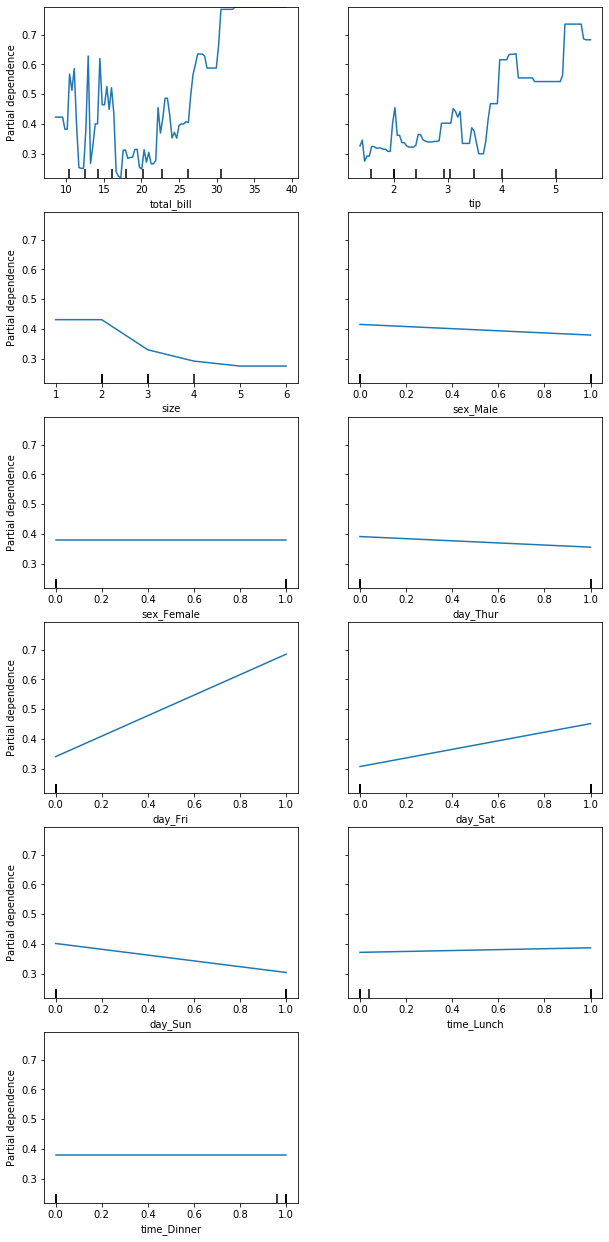

In [38]:
from sklearn.inspection import plot_partial_dependence
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10, X_tr.shape[1]*2)
features = list(range(X_tr.shape[1])) #features = [0, 1, (0, 1)]
plot_partial_dependence(model, X_tr, features, n_cols=2);